# BASELINE. Попробуем заполнить пропущенные значения средними между двумя известными.

In [1]:
import pandas as pd 
import numpy as np
import warnings
warnings.filterwarnings('ignore')
from matplotlib import pyplot as plt
from seaborn import heatmap
from seaborn import countplot

In [2]:
data_train = pd.read_csv('train.csv') # Загружаем датасет

In [3]:
target = data_train['target']

In [4]:
data_train.head()

,id,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14,target
0,1,0.670390,0.811300,0.643968,0.291791,0.284117,0.855953,0.890700,0.285542,0.558245,0.779418,0.921832,0.866772,0.878733,0.305411,7.243043
1,3,0.388053,0.621104,0.686102,0.501149,0.643790,0.449805,0.510824,0.580748,0.418335,0.432632,0.439872,0.434971,0.369957,0.369484,8.203331
2,4,0.834950,0.227436,0.301584,0.293408,0.606839,0.829175,0.506143,0.558771,0.587603,0.823312,0.567007,0.677708,0.882938,0.303047,7.776091
3,5,0.820708,0.160155,0.546887,0.726104,0.282444,0.785108,0.752758,0.823267,0.574466,0.580843,0.769594,0.818143,0.914281,0.279528,6.957716
4,8,0.935278,0.421235,0.303801,0.880214,0.665610,0.830131,0.487113,0.604157,0.874658,0.863427,0.983575,0.900464,0.935918,0.435772,7.951046


***Посмотрим на целевой признак***

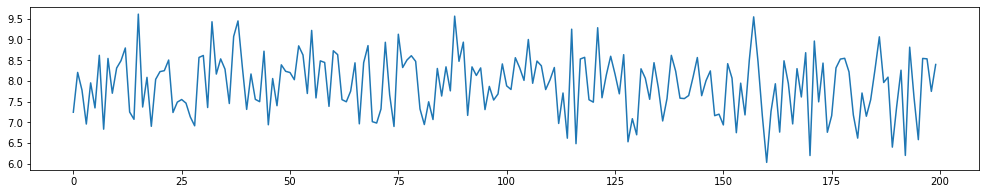

In [5]:
plt.figure(figsize=(17,3))
plt.plot(range(len(target[:200])), target[:200])

In [6]:
data_test = pd.read_csv('test.csv') # Загружаем датасет тестовый

In [7]:
data_test.head()

,id,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14
0,0,0.353600,0.738780,0.600939,0.293377,0.285691,0.458006,0.620704,0.422249,0.369203,0.435727,0.550540,0.699134,0.286864,0.364515
1,2,0.907222,0.189756,0.215531,0.869915,0.301333,0.528958,0.390351,0.521112,0.794779,0.798580,0.446475,0.449037,0.916964,0.513002
2,6,0.179287,0.355353,0.623972,0.437812,0.282476,0.320826,0.386789,0.776422,0.222268,0.229102,0.211913,0.222651,0.327164,0.827941
3,7,0.359385,0.181049,0.551368,0.206386,0.280763,0.482076,0.506677,0.362793,0.379737,0.345686,0.445276,0.518485,0.299028,0.598166
4,10,0.335791,0.682607,0.676481,0.219465,0.282861,0.581721,0.748639,0.350158,0.448915,0.506878,0.817721,0.805895,0.790591,0.249275


***Судя по id элементов в тестовом и тренировочном сетах, тестовые значения вырваны из временного ряда. Если соединить тестовые и тренировочные данные, должен получиться цельный временной ряд***

***Объединим тестовый и тренировочный датасеты***

In [8]:
# Создадим колонку Target в тестовом ДФ, Заполним её пропусками
data_test['target'] = None

In [9]:
data_test.head()

,id,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14,target
0,0,0.353600,0.738780,0.600939,0.293377,0.285691,0.458006,0.620704,0.422249,0.369203,0.435727,0.550540,0.699134,0.286864,0.364515,None
1,2,0.907222,0.189756,0.215531,0.869915,0.301333,0.528958,0.390351,0.521112,0.794779,0.798580,0.446475,0.449037,0.916964,0.513002,None
2,6,0.179287,0.355353,0.623972,0.437812,0.282476,0.320826,0.386789,0.776422,0.222268,0.229102,0.211913,0.222651,0.327164,0.827941,None
3,7,0.359385,0.181049,0.551368,0.206386,0.280763,0.482076,0.506677,0.362793,0.379737,0.345686,0.445276,0.518485,0.299028,0.598166,None
4,10,0.335791,0.682607,0.676481,0.219465,0.282861,0.581721,0.748639,0.350158,0.448915,0.506878,0.817721,0.805895,0.790591,0.249275,None


***Склеим их по id***

In [10]:
# Меняем индексы в датафреймах на id объектов таблицы
data_test.index=data_test['id'].tolist()
data_train.index=data_train['id'].tolist()

In [11]:
data_test.head(3)

,id,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14,target
0,0,0.353600,0.738780,0.600939,0.293377,0.285691,0.458006,0.620704,0.422249,0.369203,0.435727,0.550540,0.699134,0.286864,0.364515,None
2,2,0.907222,0.189756,0.215531,0.869915,0.301333,0.528958,0.390351,0.521112,0.794779,0.798580,0.446475,0.449037,0.916964,0.513002,None
6,6,0.179287,0.355353,0.623972,0.437812,0.282476,0.320826,0.386789,0.776422,0.222268,0.229102,0.211913,0.222651,0.327164,0.827941,None


In [12]:
data_train.head(3)

,id,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14,target
1,1,0.670390,0.811300,0.643968,0.291791,0.284117,0.855953,0.890700,0.285542,0.558245,0.779418,0.921832,0.866772,0.878733,0.305411,7.243043
3,3,0.388053,0.621104,0.686102,0.501149,0.643790,0.449805,0.510824,0.580748,0.418335,0.432632,0.439872,0.434971,0.369957,0.369484,8.203331
4,4,0.834950,0.227436,0.301584,0.293408,0.606839,0.829175,0.506143,0.558771,0.587603,0.823312,0.567007,0.677708,0.882938,0.303047,7.776091


In [13]:
# Добавим один Датафрейм в конец другого
data = data_train.append(data_test)

In [14]:
# Отсортируем по id
data = data.sort_values(by = ['id'])
data.head()

,id,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14,target
0,0,0.353600,0.738780,0.600939,0.293377,0.285691,0.458006,0.620704,0.422249,0.369203,0.435727,0.550540,0.699134,0.286864,0.364515,NaN
1,1,0.670390,0.811300,0.643968,0.291791,0.284117,0.855953,0.890700,0.285542,0.558245,0.779418,0.921832,0.866772,0.878733,0.305411,7.243043
2,2,0.907222,0.189756,0.215531,0.869915,0.301333,0.528958,0.390351,0.521112,0.794779,0.798580,0.446475,0.449037,0.916964,0.513002,NaN
3,3,0.388053,0.621104,0.686102,0.501149,0.643790,0.449805,0.510824,0.580748,0.418335,0.432632,0.439872,0.434971,0.369957,0.369484,8.203331
4,4,0.834950,0.227436,0.301584,0.293408,0.606839,0.829175,0.506143,0.558771,0.587603,0.823312,0.567007,0.677708,0.882938,0.303047,7.776091


In [15]:
target = data['target']

***Посмотрим на полученный временной ряд значения target с пропусками***

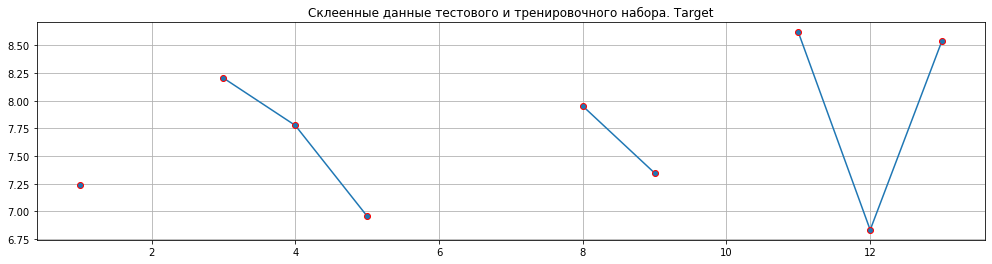

In [16]:
plt.figure(figsize=(17,4))
plt.plot(range(len(target[0:15])), target[0:15], marker ='o', markeredgecolor = 'red')
plt.title('Склеенные данные тестового и тренировочного набора. Target')
plt.grid()

### Попробуем заполнять пропущенные знаения 'target' усреднением между соседними точками, что, кажется, было бы вполне логично 

In [17]:
import math

In [18]:
target_list = target.tolist()

In [19]:
# Функция аппроксимации между существующими точками
def aproximate_target(target_list):
    
    target_list_new = target_list.copy()
    i_missed = []      # индексы пропущенных элементов
    prev_target = 6.8  # предварительная инициализация значения таргет, как предыдущего для след.итерации
    
    for i, target in enumerate(target_list_new):
        if math.isnan(target):    # Если таргет NaN
            i_missed.append(i)    # добавляем индекс пустого элемента в список
        else:                     # Если в таргет имеется число
            
            if i_missed:          # Если список пропушенных значений не пустой
                # Находим разницу между целыми элементами списка. Делим на кол-во пропусков:
                delta = (target - prev_target) / (1+i-i_missed[0])  # средняя дельта на каждый пропуск
                
                # Заполняем пропущенные значения, с шагом delta от предыдущего имеющегося значения:
                q = 0
                for index in i_missed:
                    q += 1
                    target_list_new[index] = prev_target + (delta * q)
                        
            prev_target = target   # добавляем значение таргет, как предыдущее для след.итерации
            i_missed = []          # зануляем список пропущенных значений
    
    return(target_list_new)   

In [20]:
target_list_new = aproximate_target(target_list)

***Посмотрим на корректность аппроксимации***

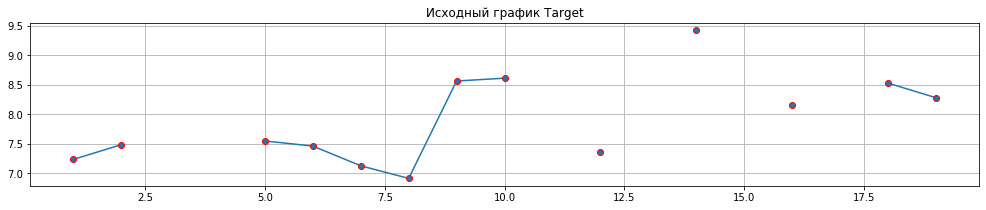

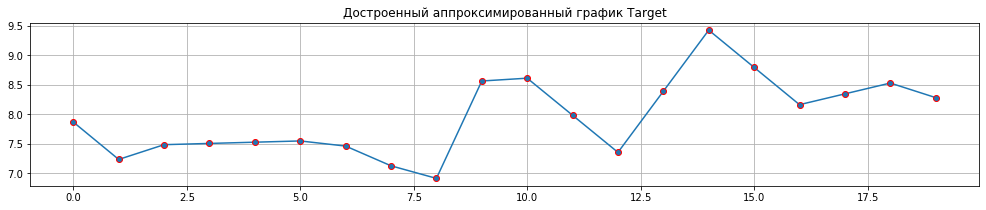

In [21]:
plt.figure(figsize=(17,3))
plt.plot(range(len(target_list[50:70])), target_list[50:70], marker ='o', markeredgecolor = 'red')
plt.title('Исходный график Target')
plt.grid()
plt.figure(figsize=(17,3))
plt.plot(range(len(target_list_new[50:70])), target_list_new[50:70], marker ='o', markeredgecolor = 'red')
plt.title('Достроенный аппроксимированный график Target')
plt.grid()

***Вглянем в более общем виде***

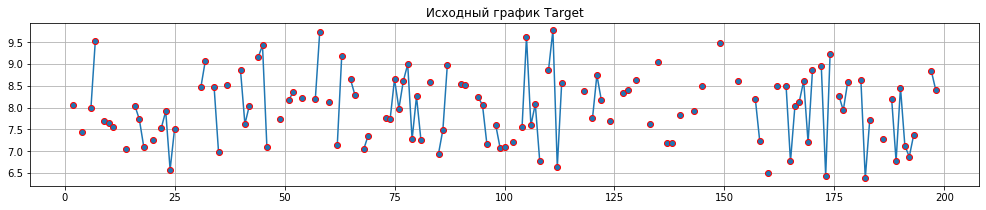

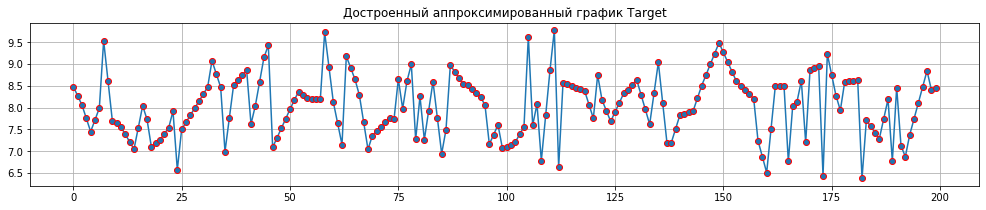

In [22]:
plt.figure(figsize=(17,3))
plt.plot(range(len(target_list[7000:7200])), target_list[7000:7200], marker ='o', markeredgecolor = 'red')
plt.title('Исходный график Target')
plt.grid()
plt.figure(figsize=(17,3))
plt.plot(range(len(target_list_new[7000:7200])), target_list_new[7000:7200], marker ='o', markeredgecolor = 'red')
plt.title('Достроенный аппроксимированный график Target')
plt.grid()

In [23]:
# проверим на пропуски
for tar in target_list_new:
    if math.isnan(tar):
        print (tar)

***Заполним список предсказаний и загрузим на проверку***

In [24]:
preds = []
for i in data_test['id'].tolist():
    preds.append(target_list_new[i])

In [26]:
sub = pd.read_csv('sample_submission.csv') # csv с ответами
sub.head()

,id,target
0,0,0.5
1,2,0.5
2,6,0.5
3,7,0.5
4,10,0.5


In [27]:
sub['target'] = preds
print(sub.head())
sub.to_csv('approximation.csv', index=False)

   id    target
0   0  7.021521
1   2  7.723187
2   6  7.288826
3   7  7.619936
4  10  7.981555


### Public score 0.91321

Будет от чего отталкиваться.